## xcube Data Store Framework - Local Directory

This notebook provides a walk-through demonstrating how to use the xcube data store framework by demonstrating how to read and explore data from a local directory.


In [1]:
# mandatory imports
from xcube.core.store import find_data_store_extensions
from xcube.core.store import get_data_store_params_schema
from xcube.core.store import new_data_store

# Utilities for notebook visualization
from IPython.display import JSON

First, let's have a look at the data stores. Which data stores are available?

If you install an xcube store plugin, it will appear in the list as well. 
Currently three different xcube store plugins are available: `xcube-sh`, `xcube-cci` and `xcube-cds`. You can find example notebooks in this directory, which introduce the different xcube store plugins.

In [2]:
JSON({e.name: e.metadata for e in find_data_store_extensions()})

<IPython.core.display.JSON object>

Usually we need more information to get the actual data store object. Which data store parameters are available for `directory`?

In [3]:
get_data_store_params_schema('directory')

Provide mandatory parameters to instantiate the store class:

In [4]:
store = new_data_store('directory', base_dir='../../serve/demo')
store

Which datasets are provided? (the list may contain both gridded and vector datasets):

In [5]:
JSON(list(store.get_data_ids()))

<IPython.core.display.JSON object>

Get more info about a specific dataset. This includes a description of the possible open formats:

In [6]:
store.describe_data('cube-1-250-250.zarr')

Which "openers" are available? Note, the first part of an opener's name identifies the returned in-memory data type:

- 'dataset:netcdf:posix',
- 'dataset:zarr:posix',
- 'geodataframe:shapefile:posix',
- 'geodataframe:geojson:posix'

- `dataset` --> `xarray.Dataset` (Gridded data)
- `mldataset` -->  `xcube.core.mlds.MultiLevelDataset`  (Gridded data, multi-resolution pyramid)
- `geodataframe` --> `geopandas.GeoDataFrame` (Vector data) 

The first opener is the default opener. In this case there are four different:

In [7]:
store.get_data_opener_ids()

('dataset:netcdf:posix',
 'dataset:zarr:posix',
 'geodataframe:shapefile:posix',
 'geodataframe:geojson:posix')

Which parameters must be passsed or are available to open the dataset? 

In [8]:
store.get_open_data_params_schema('cube-1-250-250.zarr')

There are no required parameters, so we can open the dataset without any parameters:

In [9]:
dataset = store.open_data('cube-1-250-250.zarr')
dataset

<xarray.Dataset>
Dimensions:        (bnds: 2, lat: 1000, lon: 2000, time: 5)
Coordinates:
  * lat            (lat) float64 52.5 52.5 52.49 52.49 ... 50.01 50.01 50.0 50.0
    lat_bnds       (lat, bnds) float64 dask.array<chunksize=(250, 2), meta=np.ndarray>
  * lon            (lon) float64 0.00125 0.00375 0.00625 ... 4.994 4.996 4.999
    lon_bnds       (lon, bnds) float64 dask.array<chunksize=(250, 2), meta=np.ndarray>
  * time           (time) datetime64[ns] 2017-01-16T10:09:21.834255872 ... 20...
    time_bnds      (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    c2rcc_flags    (time, lat, lon) float64 dask.array<chunksize=(1, 250, 250), meta=np.ndarray>
    conc_chl       (time, lat, lon) float64 dask.array<chunksize=(1, 250, 250), meta=np.ndarray>
    conc_tsm       (time, lat, lon) float64 dask.array<chunksize=(1, 250, 250), meta=np.ndarray>
    kd489          (time, lat, lon) float64 dask.array<chunksize=(1, 250, 250), meta=np.ndarray>
    quality_flags  (time, lat, lon) float64 dask.array<chunksize=(1, 250, 250), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.7

Plot one time stamp of the dataset for one of the datasets variables: 

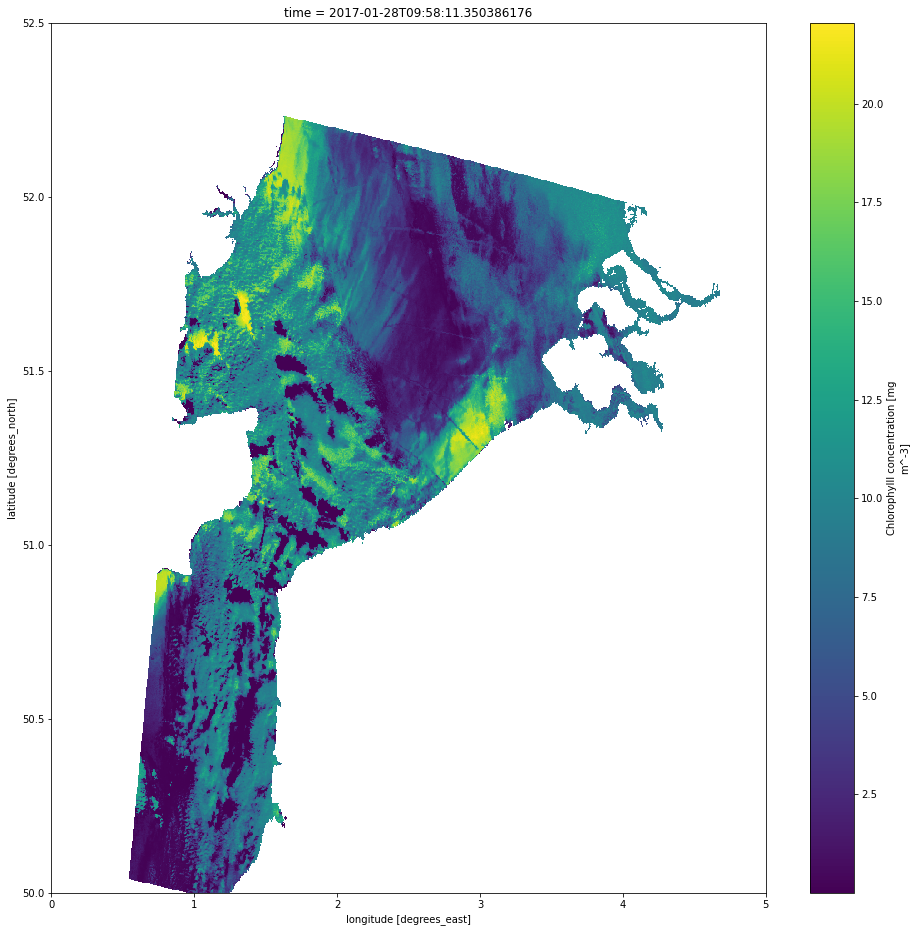

In [10]:
dataset.conc_chl.isel(time=3).plot.imshow(figsize=(16, 16))

Let's do some data processing by creating a spatial subset:

In [11]:
new_dataset = dataset.sel(lon=slice(2.8, 4.75), lat=slice(52.1, 51.2))
new_dataset

<xarray.Dataset>
Dimensions:        (bnds: 2, lat: 360, lon: 780, time: 5)
Coordinates:
  * lat            (lat) float64 52.1 52.1 52.09 52.09 ... 51.21 51.21 51.2 51.2
    lat_bnds       (lat, bnds) float64 dask.array<chunksize=(90, 2), meta=np.ndarray>
  * lon            (lon) float64 2.801 2.804 2.806 2.809 ... 4.744 4.746 4.749
    lon_bnds       (lon, bnds) float64 dask.array<chunksize=(130, 2), meta=np.ndarray>
  * time           (time) datetime64[ns] 2017-01-16T10:09:21.834255872 ... 20...
    time_bnds      (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    c2rcc_flags    (time, lat, lon) float64 dask.array<chunksize=(1, 90, 130), meta=np.ndarray>
    conc_chl       (time, lat, lon) float64 dask.array<chunksize=(1, 90, 130), meta=np.ndarray>
    conc_tsm       (time, lat, lon) float64 dask.array<chunksize=(1, 90, 130), meta=np.ndarray>
    kd489          (time, lat, lon) float64 dask.array<chunksize=(1, 90, 130), meta=np.ndarray>
    quality_flags  (time, lat, lon) float64 dask.array<chunksize=(1, 90, 130), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.7

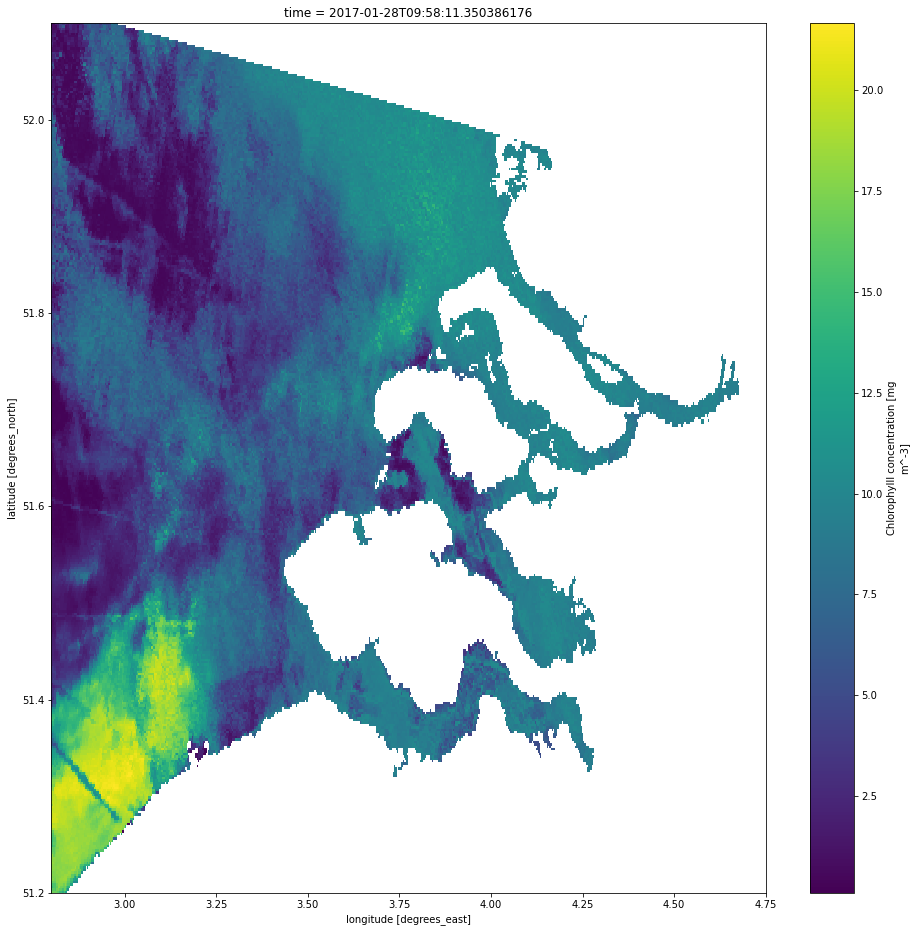

In [12]:
new_dataset.conc_chl.isel(time=3).plot.imshow(figsize=(16, 16))

Drop empty time slices: 

In [13]:
new_dataset = new_dataset.dropna('time', how='all')

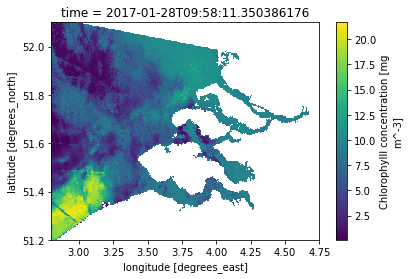

In [14]:
new_dataset.conc_chl.isel(time=2).plot.imshow()

Now let's store the processed data. Which writers are available?

In [15]:
store.get_data_writer_ids()

('dataset:netcdf:posix',
 'dataset:zarr:posix',
 'geodataframe:shapefile:posix',
 'geodataframe:geojson:posix')

Which write parameters are required/available for writer `'dataset:zarr:posix'`?

In [16]:
store.get_write_data_params_schema(writer_id='dataset:zarr:posix')

In [17]:
# Rechunk
from xcube.core.chunk import chunk_dataset
new_dataset = chunk_dataset(new_dataset, dict(lat=90, lon=90, time=1), format_name='zarr')
# new_dataset

No write parameters required, so we go without:

In [18]:
store.write_data(new_dataset, 'cube-1-250-250-subset.zarr', writer_id='dataset:zarr:posix')

'cube-1-250-250-subset.zarr'

In [19]:
JSON(list(store.get_data_ids()))

<IPython.core.display.JSON object>

In [20]:
store.delete_data('cube-1-250-250-subset.zarr')

In [21]:
JSON(list(store.get_data_ids()))

<IPython.core.display.JSON object>